In [3]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import ListedColormap
from turbo_colormap import *
import inspect
import os
import csv 
import time
import sys
import glob
import pandas as pd
from pprint import pprint
import re
# RegEx module

from tvb.simulator.lab import *
from tvb.simulator.plot.tools import *

# Input Simulation Pipeline
from SimulationPipeline import *
from useful_fns import *

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

# Sweep of Sig_I and Sig_e for 2nd Order Het 

In [29]:
# SCorr_files = glob.glob(r"D:\Simulations\2020_09_18\*Scorr*.csv")
#SCorr_files = glob.glob(r"D:\Simulations\2020_09_23\LCycle*Scorr*.csv")
#SCorr_files = glob.glob(r"D:\Simulations\2020_09_23\FixedPt*Scorr*.csv")
#SCorr_files = glob.glob(r"D:\Simulations\2020_09_23\Hysteresis*Scorr*.csv")

Regime = "LCycleCut"
#SCorr_files = glob.glob(r"D:\Simulations\2020_09_23\\" + Regime +"*Scorr*.csv")
#SCorr_files = glob.glob(r"D:\Simulations\2020_10_05\\" + Regime +"*Scorr*.csv")
#SCorr_files = glob.glob(r"D:\Simulations\2020_10_06\\" + Regime +"*Scorr*.csv")
SCorr_files = glob.glob(r"D:\Simulations\2020_10_09\\" + Regime +"*Scorr*.csv")

SCorr_files = glob.glob(r"D:\Simulations\\2020_09_10\\" + Regime + "*Scorr*.csv")

In [30]:
Params = []
SCFC = []
FCFC = []
for string in SCorr_files:

    # Obtain Parameter Values
    x = re.findall("\[(.*)\]sig_e(...).*sig_i(...)",string)
    Params.append(x[0])

    # FCFC and SCFC
    a = np.genfromtxt(string)
    SCFC.append(a[0])
    FCFC.append(a[2])

df = pd.DataFrame(Params)
df.columns = ['G','sig_e', 'sig_i']
df["SCFC"] = SCFC
df["FCFC"] = FCFC

In [31]:
df = df.sort_values(["FCFC"])
df.tail(20)

,G,sig_e,sig_i,SCFC,FCFC
412,0.65,0.2,0.4,0.473937,0.586274
413,0.65,0.2,0.4,0.473944,0.586274
541,0.7,0.0,0.6,0.437515,0.587273
542,0.7,0.0,0.6,0.437515,0.587273
624,0.8,0.0,0.2,0.416670,0.588503
625,0.8,0.0,0.2,0.416670,0.588503
538,0.7,0.0,0.2,0.460755,0.589257
537,0.7,0.0,0.2,0.460755,0.589257
401,0.65,0.0,0.4,0.477768,0.590963
400,0.65,0.0,0.4,0.477734,0.590963


In [32]:
df.loc[df['FCFC'].idxmax()]

G            0.75
sig_e         0.0
sig_i         0.4
SCFC     0.431264
FCFC     0.605378
Name: 488, dtype: object

In [33]:
df_pivot = df.sort_values('FCFC').drop_duplicates(['sig_e','sig_i'],keep='last').pivot(index='sig_e', columns='sig_i', values='FCFC')
df_pivot
# Reason why we need to do this is because the clsuter did something bad and simulated a few points multiple times (this is likely from it deciding to stop runs midway and then restarting)

sig_i,0.0,0.2,0.4,0.6,0.8,1.0
sig_e,,,,,,
0.0,0.565372,0.594400,0.605378,0.587273,0.577959,0.567670
0.2,0.549668,0.558980,0.596787,0.571292,0.565993,0.559720
0.4,0.567725,0.552187,0.578099,0.551939,0.559447,0.549693
0.6,0.577396,0.547893,0.560619,0.542475,0.534699,0.534865
0.8,0.576444,0.562844,0.529548,0.550623,0.537683,0.512451
1.0,0.535407,0.547425,0.519226,0.535080,0.503838,0.489401


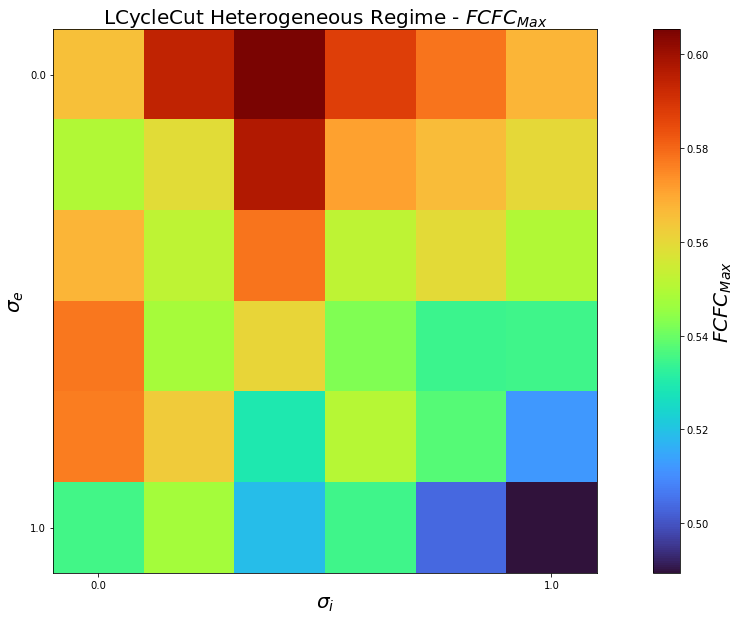

In [39]:
#ListedColormap(turbo_colormap_data) ,vmin=0,vmax=0.65
cs=plt.imshow(df_pivot, cmap=ListedColormap(turbo_colormap_data), aspect='equal', interpolation='none')
plt.title(Regime + ' Heterogeneous Regime - $FCFC_{Max}$', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('$FCFC_{Max}$', fontsize=20)
plt.yticks(ticks=np.arange(len(df_pivot.index))[::5],labels=df_pivot.index[::5])
plt.xticks(ticks=np.arange(len(df_pivot.columns))[::5],labels=df_pivot.columns[::5])
plt.xlabel("$\sigma_i$", fontsize=20)
plt.ylabel("$\sigma_e$", fontsize=20)
plt.savefig("do-not-track\\" + Regime +"_Hetsweep.pdf")
plt.show()